**Importing libraries**

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Reading dataset**

In [95]:
dataset=pd.read_csv("CarPrice_Assignment.csv")

**Preparing the dataset**

In [ ]:
dataset.info()

There is no null or missing values. So it is not necessary to impute data




In [103]:
#Converting labels of doornumber & cylindernumber to int.
dataset.loc[(dataset.doornumber=='two') ,'doornumber'] = 2
dataset.loc[(dataset.doornumber=='four') ,'doornumber'] = 4
dataset.loc[(dataset.cylindernumber=='two') ,'cylindernumber'] = 2
dataset.loc[(dataset.cylindernumber=='three') ,'cylindernumber'] = 3
dataset.loc[(dataset.cylindernumber=='four') ,'cylindernumber'] = 4
dataset.loc[(dataset.cylindernumber=='five') ,'cylindernumber'] = 5
dataset.loc[(dataset.cylindernumber=='six') ,'cylindernumber'] = 6
dataset.loc[(dataset.cylindernumber=='eight') ,'cylindernumber'] = 8
dataset.loc[(dataset.cylindernumber=='twelve') ,'cylindernumber'] = 12
# Converting enginetype dohcv to dohc as dohcv Engine type is not available
dataset.loc[(dataset.enginetype=='dohcv') ,'enginetype'] = 'dohc'

In [104]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

**Encoding the dataset**

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1]=le.fit_transform(X[:,1])
X[:,2]=le.fit_transform(X[:,2])
X[:,3]=le.fit_transform(X[:,3])
X[:,5]=le.fit_transform(X[:,5])
X[:,6]=le.fit_transform(X[:,6])
X[:,7]=le.fit_transform(X[:,7])
X[:,13]=le.fit_transform(X[:,13])
X[:,16]=le.fit_transform(X[:,16])

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Splitting the dataset**

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

**Scaling the dataset**

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Applying the most suitable algorithm for the regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 13, random_state = 0)
regressor.fit(X_train,y_train)

**Comparing the predicted results and the actual results**

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Checking the accuracy using MAE(mean average error)

In [190]:
m=0
n=0
for x in range(len(y_test)-1):
  m=m+abs(y_test[x]-y_pred[x])
  n=n+(y_test[x])
m=m/len(y_test)
n=n/len(y_test)
print(1-m/n)

0.8766197329883589


**87% ACCURACY OBTAINED**

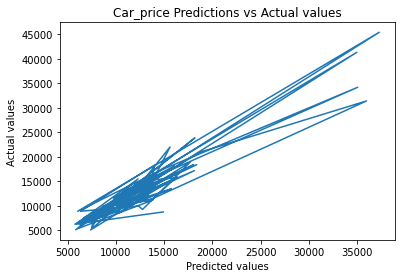

In [194]:
plt.title("Car_price Predictions vs Actual values") 
plt.xlabel("Predicted values") 
plt.ylabel("Actual values") 
plt.plot(y_pred,y_test) 
plt.show()